# Sustavi nelinearnih jednadžbi

----

__Problem:__ nađimo rješenje $\xi=(\xi_1,\xi_2,\ldots,\xi_n)$ sustava od $n$ jednadžbi 

\begin{align*}
f_1(x)&=0,\\
f_2(x)&=0,\\
&\vdots \\
f_n(x)&=0,
\end{align*}

i $n$ nepoznanica $x=(x_1,x_2,\ldots,x_n)$. Uz oznaku $f=(f_1,f_2,\ldots,f_n)^T$, ovaj sustav možemo zapisati kao 

$$
f(x)=0.
$$

Opisat ćemo _Newton-ovu metodu_ i tri _kvazi-Newton-ove_ metode:

2. _Broyden-ovu_ metodu,
3. _Davidon-Fletcher-Powell_ metodu i 
3. _Broyden-Fletcher-Goldfarb-Schano_ metodu.

Sve metode, uz zadanu početnu aproksimaciju $x^{(0)}$,  generiraju niz točaka $x^{(n)}$ koji, uz određene uvjete, konvergira prema rješenju $\xi$. 

__Napomena:__ Opisi metoda se nalaze u knjizi [Numerička matematika, poglavlje 4.4][RS04]. Brojevi primjera se odnose na isto poglavlje.

[RS04]: http://www.mathos.unios.hr/pim/Materijali/Num.pdf "R. Scitovski, 'Numerička matematika', Sveučilište u Osijeku, Osijek, 2004."

## Newtonova metoda

__Jacobijan__ ili __Jacobi-jeva matrica__ funkcija $f$ u točki $x$ je matrica prvih parcijalnih derivacija

$$
J(f,x)=\begin{bmatrix} \displaystyle\frac{\partial f_1(x)}{\partial x_1} & \displaystyle\frac{\partial f_1(x)}{\partial x_2} & \cdots &
\displaystyle\frac{\partial f_1(x)}{\partial x_n} \\
\displaystyle\frac{\partial f_2(x)}{\partial x_1} & \displaystyle\frac{\partial f_2(x)}{\partial x_2} & \cdots &
\displaystyle\frac{\partial f_2(x)}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\displaystyle\frac{\partial f_n(x)}{\partial x_1} & \displaystyle\frac{\partial f_n(x)}{\partial x_2} & \cdots &
\displaystyle\frac{\partial f_n(x)}{\partial x_n} 
\end{bmatrix}.
$$

Za zadanu početnu aproksimaciju $x^{(0)}$, računamo niz točaka

$$
x^{(k+1)}=x^{(k)}-s^{(k)}, \quad k=0,1,2,\ldots,
$$

gdje je $s^{(k)}$ rješenje sustava

$$
J\big(f,x^{(k)}\big)\cdot s=f\big(x^{(k)}\big).
$$

Za računanje Jacobijana koristimo paket [`ForwardDiff.jl`](http://www.juliadiff.org/ForwardDiff.jl/perf_diff.html#derivatives). Za crtanje funkcija koristimo paket `PyPlot.jl`.

In [1]:
using ForwardDiff
using PyPlot

In [2]:
function myNewton{T}(f::Function,J::Function,x::Array{T},ϵ::T)
    iter=0
    s=ones(x)
    ξ=x
    while vecnorm(s)>ϵ && iter<100
        s=J(x)\f(x)
        ξ=x-s
        iter+=1
        x=ξ
    end
    ξ,iter
end

myNewton (generic function with 1 method)

### Zadatak 4.4 (a) 

In [3]:
# Zadatak 4.4 (a) (Dennis, Schnabel (1996))
x=Vector{Float64}
fa(x)=[2(x[1]+x[2])^2+(x[1]-x[2])^2-8,5*x[1]^2+(x[2]-3)^2-9]

fa (generic function with 1 method)

In [4]:
fa([1.0,2])

2-element Array{Float64,1}:
 11.0
 -3.0

Nacrtajmo funkcije i konture kako bi mogli približno locirati nul-točke:

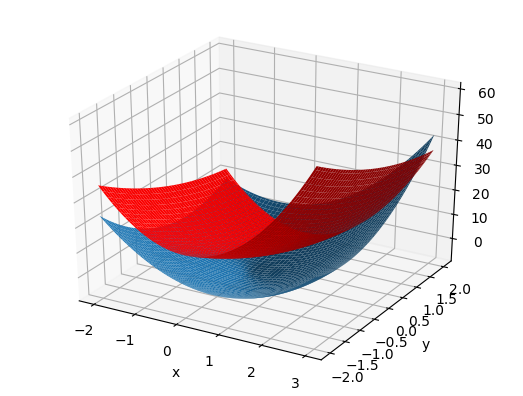

PyObject <matplotlib.text.Text object at 0x00000000428D9EB8>

In [5]:
gridsize=100
X=linspace(-2,3,gridsize)
Y=linspace(-2,2,gridsize)
gridX=repmat(X,1,gridsize)
gridY=repmat(Y',gridsize,1);
Z1=[fa([gridX[i,j],gridY[i,j]])[1] for i=1:gridsize, j=1:gridsize]
Z2=[fa([gridX[i,j],gridY[i,j]])[2] for i=1:gridsize, j=1:gridsize]
surf(gridX,gridY,Z1)
surf(gridX,gridY,Z2,color="red")
xlabel("x")
ylabel("y")

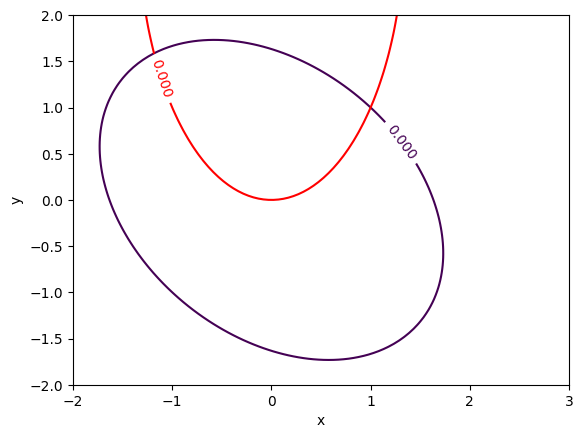

PyObject <matplotlib.text.Text object at 0x0000000046C372B0>

In [6]:
C1=contour(gridX,gridY,Z1,levels=[0])
C2=contour(gridX,gridY,Z2,levels=[0],colors="red")
clabel(C1,inline=1, fontsize=10)
clabel(C2,inline=1, fontsize=10)
xlabel("x")
ylabel("y")

Vidimo da su nul-točke približno $x_1=(-1,1.5)$ i $x_2=(1,1)$. Štoviše, $x_2$ je točno jednaka $(1,1)$ (1 iteracija u trećem primjeru). Nadalje, metoda ne mora konvergirati (četvrti primjer).   

In [7]:
x1=[-1.0,0]
x2=[0.5,1.1]
Ja(x)=ForwardDiff.jacobian(fa,x)

Ja (generic function with 1 method)

In [8]:
# Na primjer:
Ja([1.0,2])

2×2 Array{Float64,2}:
 10.0  14.0
 10.0  -2.0

In [9]:
myNewton(fa,Ja,x1,1e-10), myNewton(fa,Ja,x2,1e-10), 
myNewton(fa,Ja,[1.0,1],1e-10), myNewton(fa,Ja,[0.0,0],1e-10)

(([-1.18347, 1.58684], 8), ([1.0, 1.0], 6), ([1.0, 1.0], 1), ([NaN, NaN], 2))

### Zadatak 4.4 (b) 

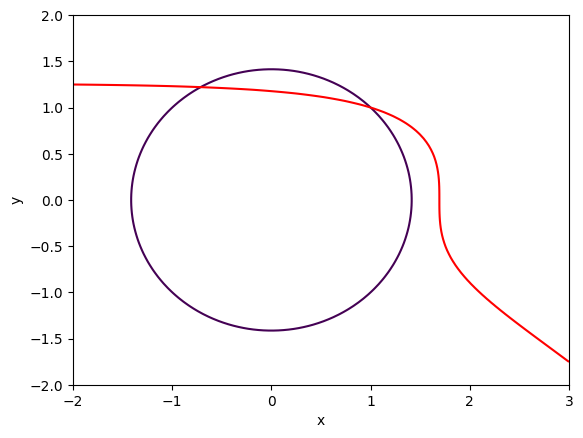

PyObject <matplotlib.text.Text object at 0x00000000459C1780>

In [10]:
# Zadatak 4.4 (b) (Dennis, Schnabel (1996))
x=Vector{Float64}
fb(x)=[x[1]^2+x[2]^2-2,exp(x[1]-1)+x[2]^3-2]
# Uzet cemo X i Y iz zadatka 4.4 (a) 
Z1=[fb([gridX[i,j],gridY[i,j]])[1] for i=1:gridsize, j=1:gridsize]
Z2=[fb([gridX[i,j],gridY[i,j]])[2] for i=1:gridsize, j=1:gridsize]
C1=contour(gridX,gridY,Z1,levels=[0])
C2=contour(gridX,gridY,Z2,levels=[0],colors="red")
xlabel("x")
ylabel("y")

In [11]:
# U knjizi je navedena samo druga nultočka!
Jb(x)=ForwardDiff.jacobian(fb,x)
myNewton(fb,Jb,[-1.0,1],1e-10), myNewton(fb,Jb,[0.8,1.2],1e-10)

(([-0.713747, 1.22089], 5), ([1.0, 1.0], 5))

### Zadatak 4.4 (c)

Zadan je prbolem $f(x)=0$, gdje je

$$
f(x)=\begin{bmatrix}x_1 \\ x_2^2-x_2 \\ e^{x_3}-1 \end{bmatrix}.
$$

Točna rješenja su $x=(0,0,0)$ i $x=(0,-1,0)$. Izračunat ćemo nul-točke s nekoliko početnih aproksimacija.

In [12]:
# Zadatak 4.4 (c) (Dennis, Schnabel (1996))
x=Vector{Float64}
fc(x)=[x[1],x[2]^2+x[2],exp(x[3])-1]
Jc(x)=ForwardDiff.jacobian(fc,x)

Jc (generic function with 1 method)

In [13]:
myNewton(fc,Jc,[-1.0,1.0,0.0],1e-10),myNewton(fc,Jc,[1.0,1,1],1e-10),
myNewton(fc,Jc,[-1.0,1,-10],1e-10),myNewton(fc,Jc,[0.5,-1.5,0],1e-10)

(([0.0, 0.0, 0.0], 7), ([0.0, 0.0, 7.78375e-17], 7), ([0.0, 0.0666667, NaN], 2), ([0.0, -1.0, 0.0], 6))

### Zadatak 4.4 (d) 

Zadana je funkcija

$$
f(x)=100(x_2-x_1)^2+(1-x_1)^2.
$$

Tražimo moguće ekstreme funkcije, odnosno želimo riješiti jednadžbu

$$
\mathop{\mathrm{grad}} f(x)=0.
$$

In [14]:
# Zadatak 4.4 (d) (Rosenbrock parabolic valley)
x=Vector{Float64}
fd1(x)=100(x[2]-x[1]^2)^2+(1-x[1])^2

fd1 (generic function with 1 method)

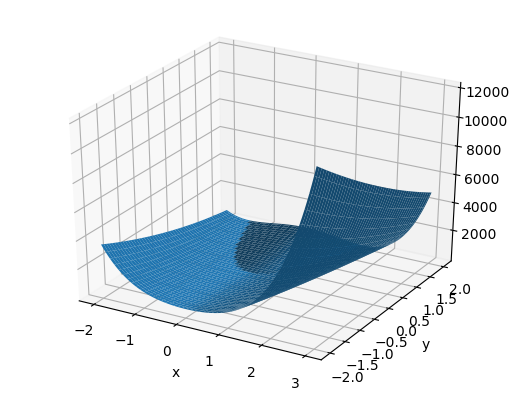

PyObject <matplotlib.text.Text object at 0x000000004553F278>

In [15]:
# Nacrtajmo funkciju.
# Uzet cemo X i Y iz zadatka 4.4 (a)
Z=[fd1([gridX[i,j],gridY[i,j]]) for i=1:gridsize, j=1:gridsize]
surf(gridX,gridY,Z)
xlabel("x")
ylabel("y") 

In [16]:
# Funkcija je zahtjevna u smislu određivanje ekstrema
fdg(x)=ForwardDiff.gradient(fd1,x)

fdg (generic function with 1 method)

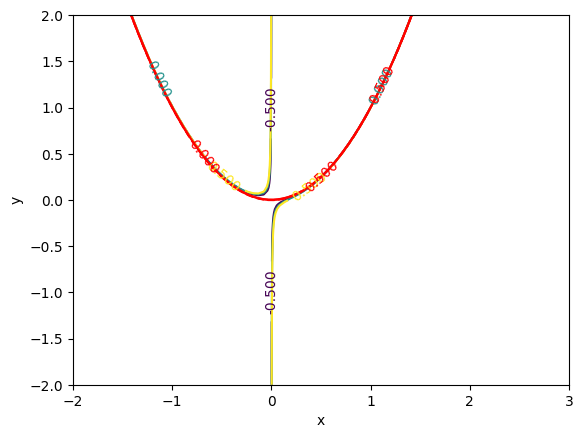

PyObject <matplotlib.text.Text object at 0x000000000342EE10>

In [17]:
Z1=[fdg([gridX[i,j],gridY[i,j]])[1] for i=1:gridsize, j=1:gridsize]
Z2=[fdg([gridX[i,j],gridY[i,j]])[2] for i=1:gridsize, j=1:gridsize]
C1=contour(gridX,gridY,Z1,levels=[-0.5,0,0.5])
C2=contour(gridX,gridY,Z2,levels=[-0.5,0,0.5],colors="red")
clabel(C1,inline=1, fontsize=10)
clabel(C2,inline=1, fontsize=10)
xlabel("x")
ylabel("y")

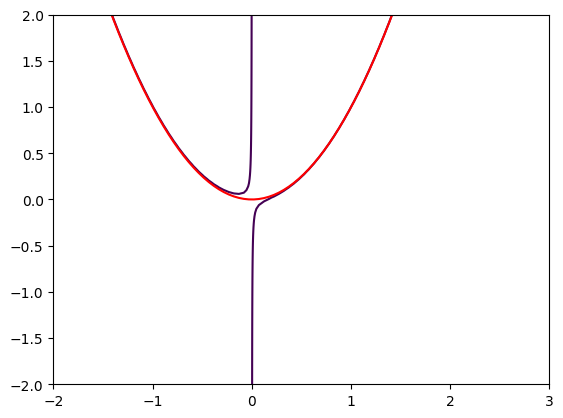

PyObject <matplotlib.contour.QuadContourSet object at 0x0000000046095240>

In [18]:
# Pogledajmo samo nivo-krivulju za z=0
C1=contour(gridX,gridY,Z1,levels=[0])
C2=contour(gridX,gridY,Z2,levels=[0],colors="red")

Iz kontura vidimo da je primjer numerički zahtjevan! Analitički lako vidimo da je jedina nul-točka $x_1=(1,1)$.

U ovom primjeru funkcija je zadana kao gradijent skalarne funkcije pa Jacobi-jevu matricu računamo korištenjem funkcije `FowardDiff.hessian()` koja računa matricu drugih parcijalnih derivacija polazne funkcije. 

In [19]:
myNewton(fdg,x->ForwardDiff.hessian(fd1,x),[-1.0,2.0],1e-10)

([1.0, 1.0], 7)

### Zadatak 4.4 (e) 

Zadana je fukcija

$$
f(x)=\sum_{i=1}^{11} \bigg(x_3 \cdot \exp\bigg(-\frac{(t_i-x_1)^2}{x_2}\bigg)-y_i\bigg)^2,
$$

gdje su brojevi $(t_i,y_i)$ zadani tablicom:

| $i$ | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |10 | 11 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| $t_i$ | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |10 | 
| $y_i$ | 0.001 | .01 | .04 | .12 | .21 | .25 | .21 | .12 | .04 | .01 | .001 |

Želimo riješiti jednadžbu 

$$
\mathop{\mathrm{grad}} f(x)=0.
$$


Za razliku od prethodnih zadataka, gdje je kondicija $$\kappa(J)=O(10)$$ u zadacima (a), (b) i (c) i 
$$\kappa(J)=O(1000)$$ u zadatku (d), u ovom zadatku je $$\kappa(J)>O(10^6)$$ 

pa je metoda netočna i ne konvergira prema točnom rješenju $x=(4.93,2.62,0.28)$.

In [20]:
t=collect(0:10)
y=[0.001,0.01,0.04,0.12,0.21,0.25,0.21,0.12,0.04,0.01,0.001]
x=Vector{Float64}
fe(x)=sum([( x[3]*exp(-((t[i]-x[1])^2/x[2]))-y[1])^2 for i=1:11])

fe (generic function with 1 method)

In [21]:
# Početna točka je vrlo blizu rješenja
x0=[4.9,2.63,0.28]
fe(x0)
feg(x)=ForwardDiff.gradient(fe,x)
Je(x)=ForwardDiff.hessian(fe,x)
feg(x0), cond(Je(x0))

([2.71553e-6, 0.029986, 1.13247], 173703.69351181446)

In [22]:
x1,iter=myNewton(feg,Je,x0,1e-8)

([6.50244, 0.00245085, -1.60888e-7], 100)

In [23]:
feg(x1)

3-element Array{Float64,1}:
  1.52356e-51
  2.04301e-49
 -3.07371e-47

In [24]:
x0=[4.9,2.62,0.28]
x1,iter=myNewton(feg,Je,x0,1e-8)

([NaN, NaN, NaN], 13)

## Broyden-ova metoda

Za odabranu početnu aproksimaciju $x_0$ i matricu $B_0$, za $k=0,1,2,\ldots$, računamo redom:

\begin{align*}
B_k \cdot s_k & = -f(x_k) \quad \textrm{(sustav)}\\
x_{k+1}&=x_{k}+s_k\\
y_k&=f(x_{k+1})-f(x_{k})\\
B_{k+1}&=B_k+\frac{(y_k-B_ks_k)s_k^T}{s_k\cdot s_k}
\end{align*}

Na ovaj način izbjegavamo računanje Jacobijeve matrice u svakom koraku.
Možemo uzeti $B_0=J(x_0)$, ali i neku drugu matricu.

In [25]:
function myBroyden{T}(f::Function,B::Matrix,x::Array{T},ϵ::T)
    iter=0
    s=ones(x)
    ξ=x
    while vecnorm(s)>ϵ && iter<100
        s=-(B\f(x))
        ξ=x+s
        y=f(ξ)-f(x)
        B=B+(y-B*s)*(s/(s⋅s))'
        x=ξ
        iter+=1
    end
    ξ,iter
end

myBroyden (generic function with 1 method)

In [26]:
# Zadatak 4.4 (a)
x0=[-1.0,0.0]
x1=[1.0,1.5]
myBroyden(fa,Ja(x0),x0,1e-10), myBroyden(fa,Ja(x1),x1,1e-10)

(([-1.18347, 1.58684], 12), ([1.0, 1.0], 7))

In [27]:
# Objasnite ponašanje metode kada za početnu matricu uzmemo jediničnu matricu! 
myBroyden(fa,eye(2),x0,1e-10), myBroyden(fa,eye(2),x1,1e-10),
myBroyden(fa,eye(2),[-1,1.5],1e-10)

(([-0.0356391, -2.53166], 100), ([0.916022, -3.04547], 100), ([-1.18347, 1.58684], 14))

In [28]:
# Zadatak 4.4 (b)
x0=[-1.0,1]
x1=[0.8,1.2]
myBroyden(fb,Jb(x0),x0,1e-10), 
myBroyden(fb,Jb(x1),x1,1e-10)

(([-0.713747, 1.22089], 9), ([1.0, 1.0], 9))

In [29]:
# Zadatak 4.4 (c)
x0=[-1.0,1,0]
x1=[0.5,-1.5,0]
myBroyden(fc,Jc(x0),x0,1e-10), 
myBroyden(fc,Jc(x1),x1,1e-10)

(([0.0, 5.96536e-26, 0.0], 9), ([0.0, -1.0, 0.0], 8))

In [30]:
# Zadatak 4.4 (d)
x0=[-1.0,2]
x1=[0.8,0.5]
myBroyden(fdg,(x->ForwardDiff.hessian(fd1,x))(x0),x0,1e-10), # ali
myBroyden(fdg,(x->ForwardDiff.hessian(fd1,x))([1,2.0]),x0,1e-10),
myBroyden(fdg,(x->ForwardDiff.hessian(fd1,x))(x1),x1,1e-10)

(([0.834064, 0.695042], 100), ([1.0, 1.0], 4), ([1.0, 1.0], 29))

In [31]:
# Zadatak 4.4 (e)
x0=[4.9,2.6,0.2]
x1,iter=myBroyden(feg,(x->ForwardDiff.hessian(fe,x))(x0),x0,1e-10)

([18.9003, 1.32399, 0.0665517], 6)

In [32]:
feg(x1)

3-element Array{Float64,1}:
  1.85527e-29
 -6.2359e-29 
 -2.07346e-29

## Davidon-Fletcher-Powell (DFP) metoda

DFP je optimizacijska metoda koja traži točke ekstrema funkcije 
$F:\mathbb{R}^n \to \mathbb{R}$, u kojem slučaju je $f(x)=\mathop{\mathrm{grad}}F(x)$.

Za odabranu početnu aproksimaciju $x_0$ i matricu $H_0$, za $k=0,1,2,\ldots$, računamo redom:

\begin{align*}
s_k&=-H_k f(x_k)\\
\beta_k&=\mathop{\mathrm{arg\ min}}_\beta F(x_{k}+\beta s_k) \\
s_k&=\beta_k s_k\\
x_{k+1}&=x_{k}+s_k \\
y_k&=f(x_{k+1})-f(x_{k})\\
H_{k+1}&=H_k+ \frac{s_k s_k^T}{y_k\cdot s_k}-\frac{H_k y_k y_k^T H_k}{y_k\cdot (H_k y_k)}.
\end{align*}

Za matricu $H_0$ možemo uzeti jediničnu matricu, a za izvršavanje iteracije nije potrebno rješavati sustav linearnih jednadžbi, već se sva ažuriranja vrše s $O(n^2)$ operacija.

Jednodimenzionalnu minimizaciju po pravcu $x_{k}+\beta s_k$ računamo tako što metodom bisekcije tražimo nul-točke usmjerene derivacije.

In [33]:
function mybisection{T}(f::Function,a::T,b::T,ϵ::T)
    fa=f(a)
    fb=f(b)
    x=T
    fx=T
    if fa*fb>zero(T)
        #return "Incorrect interval"
        if abs(fa)>abs(fb)
            return b,fb,0
        else
            return a,fa,0
        end
    end
    iter=0
    while b-a>ϵ && iter<1000
        x=(b+a)/2.0
        fx=f(x)
        if fa*fx<zero(T)
            b=x
            fb=fx
        else
            a=x
            fa=fx
        end
        iter+=1
        # @show x,fx
    end
    x,fx,iter
end

mybisection (generic function with 1 method)

In [34]:
function myDFP{T}(f::Function,H::Matrix,x::Array{T},ϵ::T)
    iter=0
    s=ones(x)
    ξ=x
    while vecnorm(s)>ϵ && iter<50
        s=-H*f(x)
        s0=s/vecnorm(s)
        F(ζ)=f(x+ζ*s)⋅s0
        β,fx,iterb=mybisection(F,0.0,1.0,10*eps())
        s*=β
        ξ=x+s
        y=f(ξ)-f(x)
        z=H*y
        H=H+(s/(y⋅s))*s'-(z/(y⋅z))*z'
        x=ξ
        iter+=1
    end
    ξ,iter
end

myDFP (generic function with 1 method)

__Primjer.__ Nađimo točku ekstrema funkcije 

$$
f(x,y)=(x+2y-7)^2+(2x+y-5)^2.
$$

Funkcija ima minimum u točki $(1,3)$.

In [35]:
x=Vector{Float64}
fs(x) = (x[1] + 2*x[2]-7)^2 + (2*x[1] + x[2]-5)^2

fs (generic function with 1 method)

In [36]:
fs([1,2])

5

In [37]:
fsg(x)=ForwardDiff.gradient(fs,x)

fsg (generic function with 1 method)

In [38]:
myDFP(fsg,eye(2),[0.8,2.7],eps())

([1.0, 3.0], 4)

In [39]:
# Zadatak 4.4 (d)
myDFP(fdg,eye(2),[0.9,1.1],1.0e-10)

([1.0, 1.0], 9)

In [40]:
# Zadatak 4.4 (e)
myDFP(feg,eye(3),[4.9,2.6,0.2],1.0e-10)

([4.89611, 46.1979, 0.00158913], 25)

## Broyden-Fletcher-Goldfarb-Schano (BFGS) metoda

BFGS je optimizacijska metoda koja uspješno traži točke ekstrema funkcije 
$F:\mathbb{R}^n \to \mathbb{R}$, u kojem slučaju je $f(x)=\mathop{\mathrm{grad}}F(x)$.

Metoda je slična DFP metodi, s nešto boljim svojstvima konvergencije.

Neka je zadana funkcija $F:\mathbb{R}^n \to \mathbb{R}$, čiji minimum tražimo, i neka je 
$f(x)=\mathop{\mathrm{grad}} F(x)$.

Za odabranu početnu aproksimaciju $x_0$ i matricu $H_0$, za $k=0,1,2,\ldots$, računamo redom:

\begin{align*}
s_k&=-H_k f(x_k)\\
\beta_k&=\mathop{\mathrm{arg\ min}}F(x_{k}+\beta_k s_k) \\
s_k&=\beta_k s_k\\
x_{k+1}&=x_{k}+s_k \\
y_k&=f(x_{k+1})-f(x_{k})\\
H_{k+1}&=\bigg(I-\frac{s_k y_k^T}{y_k\cdot s_k}\bigg)H_k
\bigg( I-\frac{y_k s_k^T}{y_k\cdot s_k}\bigg)+\frac{s_k s_k^T}{y_k\cdot s_k}.
\end{align*}

Za matricu $H_0$ možemo uzeti jediničnu matricu, a za izvršavanje iteracije nije potrebno rješavati sustav linearnih jednadžbi, već se sva ažuriranja vrše s $O(n^2)$ operacija.

Jednodimenzionalnu minimizaciju po pravcu $x_{k}+\beta s_k$ računamo tako što metodom bisekcije tražimo nul-točke usmjerene derivacije.

In [41]:
function myBFGS{T}(f::Function,H::Matrix,x::Array{T},ϵ::T)
    iter=0
    s=ones(x)
    ξ=x
    while vecnorm(s)>ϵ && iter<50
        s=-H*f(x)
        s0=s/vecnorm(s)
        F(ζ)=f(x+ζ*s)⋅s0
        β,fx,iterb=mybisection(F,0.0,1.0,10*eps())
        s*=β
        ξ=x+s
        y=f(ξ)-f(x)
        z=H*y
        α=y⋅s
        s1=s/α
        H=H-s1*z'-z*s1'+s1*(y⋅z)*s1'+s1*s'
        x=ξ
        iter+=1
    end
    ξ,iter
end

myBFGS (generic function with 1 method)

In [42]:
myBFGS(fsg,eye(2),[0.8,2.7],eps())

([1.0, 3.0], 4)

In [43]:
# Zadatak 4.4 (d)
myBFGS(fdg,eye(2),[0.9,1.1],1e-10)

([1.0, 1.0], 9)

In [44]:
# Zadatak 4.4 (e)
x0=[4.9,2.6,0.2]
x1,iter=myBFGS(feg,eye(3),x0,1e-10)

([2.08908, 31226.6, 0.00100056], 50)

## Julia paketi

Prethodni programi su jednostavne implemntacije navedenih algoritama radi ilustracije.
Julia ima paket [NLsolve.jl](https://github.com/JuliaNLSolvers/NLsolve.jl) za rješavanje sustava nelineranih jednadžbi i paket [Optim.jl](https://github.com/JuliaNLSolvers/Optim.jl) za nelinearnu optimizaciju.

In [45]:
using NLsolve

In [46]:
# Zadatak 4.4 (a)
x1=[-1.0,0]
x2=[0.5,1.1]
function fa!(x, fvec)
    fvec[1] = 2(x[1]+x[2])^2+(x[1]-x[2])^2-8
    fvec[2] = 5*x[1]^2+(x[2]-3)^2-9
end

fa! (generic function with 1 method)

In [47]:
nlsolve(fa!,x1)

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [-1.0, 0.0]
 * Zero: [-1.18347, 1.58684]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [48]:
nlsolve(fa!,x2)

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.5, 1.1]
 * Zero: [1.0, 1.0]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [49]:
# Zadatak 4.4 (b)
function fb!(x, fvec)
    fvec[1] = x[1]^2+x[2]^2-2
    fvec[2] = exp(x[1]-1)+x[2]^3-2
end
nlsolve(fb!,[-1.0,1]), nlsolve(fb!,[0.8,1.2])

(Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [-1.0, 1.0]
 * Zero: [-0.713747, 1.22089]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5, Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.8, 1.2]
 * Zero: [1.0, 1.0]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5)

In [50]:
# Zadatak 4.4 (c)
function fc!(x, fvec)
    fvec[1] = x[1]
    fvec[2] = x[2]^2+x[2]
    fvec[3] = exp(x[3])-1
end
nlsolve(fc!,[-1.0,1.0,0.0]), nlsolve(fc!,[1.0,1,1]),
nlsolve(fc!,[-1.0,1,-10]), nlsolve(fc!,[0.5,-1.5,0])

(Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [-1.0, 1.0, 0.0]
 * Zero: [0.0, 2.32831e-10, 0.0]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6, Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [1.0, 1.0, 1.0]
 * Zero: [0.0, 2.32831e-10, 1.22324e-12]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6, Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [-1.0, 1.0, -10.0]
 * Zero: [0.0, 4.99781e-11, 8.13171e-17]
 * Inf-norm of residuals: 0.000000
 * Iterations: 20
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0

In [51]:
using Optim

In [52]:
# Zadatak 4.4 (d)
optimize(fd1,[-1.0,2],BFGS())

Results of Optimization Algorithm
 * Algorithm: BFGS
 * Starting Point: [-1.0,2.0]
 * Minimizer: [0.9999999926685406,0.9999999853370399]
 * Minimum: 5.375030e-17
 * Iterations: 35
 * Convergence: true
   * |x - x'| < 1.0e-32: false 
     |x - x'| = 5.13e-09 
   * |f(x) - f(x')| / |f(x)| < 1.0e-32: false
     |f(x) - f(x')| / |f(x)| = NaN 
   * |g(x)| < 1.0e-08: true 
     |g(x)| = 2.10e-11 
   * stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 102
 * Gradient Calls: 102

In [53]:
# Zadatak 4.4 (e) - opet ne konvergira prema rješenju
optimize(fe,[4.9,2.6,0.2],BFGS())

Results of Optimization Algorithm
 * Algorithm: BFGS
 * Starting Point: [4.9,2.6,0.2]
 * Minimizer: [-188.4953862326639,2.147419575851852e6, ...]
 * Minimum: 3.572548e-12
 * Iterations: 41
 * Convergence: true
   * |x - x'| < 1.0e-32: false 
     |x - x'| = 1.87e+05 
   * |f(x) - f(x')| / |f(x)| < 1.0e-32: false
     |f(x) - f(x')| / |f(x)| = NaN 
   * |g(x)| < 1.0e-08: true 
     |g(x)| = 9.69e-09 
   * stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 137
 * Gradient Calls: 137